In [13]:
import pandas as pd
import matplotlib.pyplot as plt

bad_pizza_dataset = pd.DataFrame.from_dict({
    'tomato_sauce': ['no', 'no', 'yes', 'yes'],
    'barbecue_sauce': ['no', 'yes', 'no', 'yes'],
    'result': ['sauce error', 'good', 'good', 'sauce error']
}
)
bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result
0,no,no,sauce error
1,no,yes,good
2,yes,no,good
3,yes,yes,sauce error


<AxesSubplot: xlabel='c_tomato_sauce', ylabel='c_barbecue_sauce'>

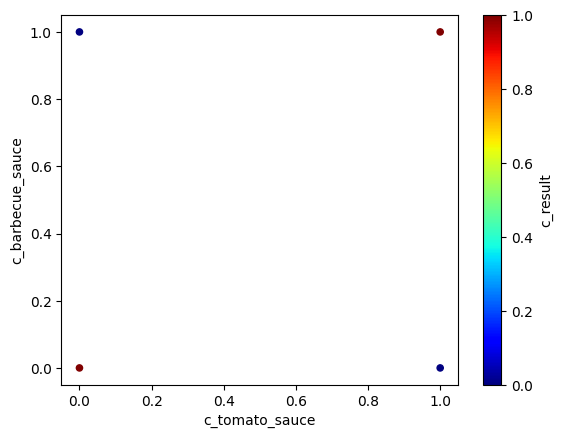

In [14]:
# data normalization
bad_pizza_dataset['c_tomato_sauce'] = bad_pizza_dataset['tomato_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_barbecue_sauce'] = bad_pizza_dataset['barbecue_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_result'] = bad_pizza_dataset['result'].apply(lambda x: 1 if x == 'sauce error' else 0)

bad_pizza_dataset.plot(
    kind='scatter',
    x='c_tomato_sauce',
    y='c_barbecue_sauce',
    c='c_result',
    colormap='jet'
)

In [15]:
from keras.optimizers import SGD
from keras import Sequential
from keras.layers import Dense

input_layer = Dense(units=2, input_dim=2, activation='sigmoid')

output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)
sgd = SGD()
bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

bad_pizza_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']],
    bad_pizza_dataset['c_result'],
    epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 1s 755ms/step - loss: 0.7133 - accuracy: 0.7500
Epoch 2/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.7132 - accuracy: 0.7500
Epoch 3/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.7500
Epoch 4/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.7500
Epoch 5/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.7500
Epoch 6/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.7500
Epoch 7/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.7500
Epoch 8/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.7500
Epoch 9/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.7127 - accuracy: 0.7500
Epoch 10/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.7127 - accuracy: 0.7500
Epoch 11/3000
1/1

In [17]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']],
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 124ms/step - loss: 0.6933 - accuracy: 0.5000
Evaluation result on Test Data : Loss = 0.6933485865592957, accuracy = 0.5


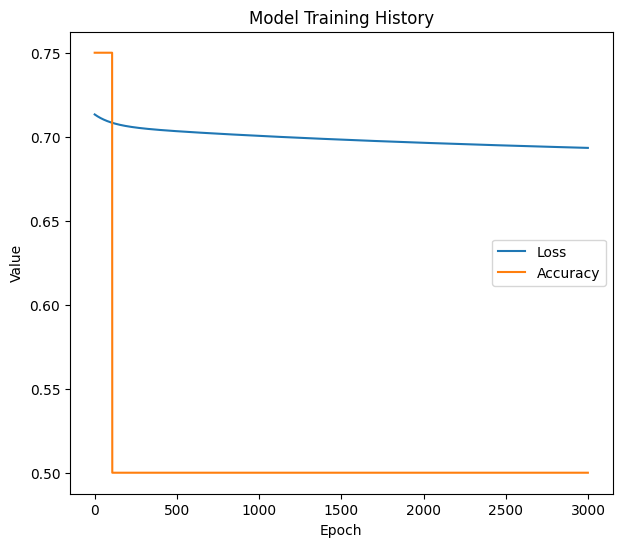

In [18]:
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

In [19]:
input_layer = Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = Dense(units=1, activation='sigmoid')

bad_pizza_model = Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)

high_lr_sgd = SGD(learning_rate=1) # Increasing learning rate (10 was too much)

bad_pizza_model.compile(loss='binary_crossentropy', optimizer=high_lr_sgd, metrics=['accuracy'])

bad_pizza_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
high_lr_model_history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']],
    bad_pizza_dataset['c_result'],
    epochs=3000
)

Epoch 1/3000
1/1 [==============================] - 0s 380ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.7500
Epoch 5/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.7500
Epoch 6/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.7500
Epoch 7/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.7500
Epoch 8/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.7500
Epoch 9/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.7500
Epoch 10/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.6835 - accuracy: 0.5000
Epoch 11/3000
1/1

In [21]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']],
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 [==============================] - 0s 89ms/step - loss: 0.0036 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.003580711083486676, accuracy = 1.0


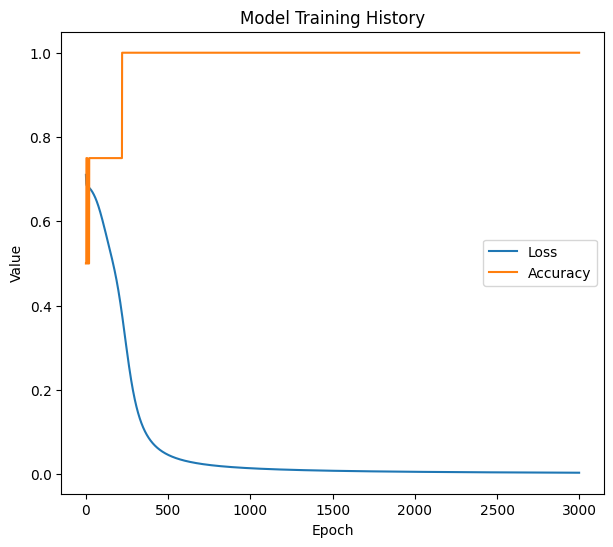

In [23]:
plt.figure(figsize=(7, 6))
plt.plot(high_lr_model_history.history['loss'])
plt.plot(high_lr_model_history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()